#### The data set refers to clients of a wholesale distributor. 
#### It includes the annual spending in monetary units (m.u.) on diverse product categories
#### The clusters can come out to be in the form such as where is the spending on diverse product categories less and where it is more
#### The project goal is to use various unsupervised learning techniques to segment customers

#### In this project , unsupervised learning techniques will be applied on the data collected for customers of a wholesale distributor in Lisbon, Portugal to identify customer segments hidden in the data 

Attribute Information:
1) FRESH: annual spending (m.u.) on fresh products (Continuous)

2) MILK: annual spending (m.u.) on milk products (Continuous)

3) GROCERY: annual spending (m.u.)on grocery products (Continuous)

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

Also, the records represent the customers

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [93]:
df_original = pd.read_csv("Wholesale_customers_data.csv")

In [94]:
# df_copy = df_original.drop(['Region'], axis = 1)

In [95]:
df = df_original.drop(['Region', 'Channel'], axis = 1)

In [96]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [97]:
df.shape

(440, 6)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [99]:
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [100]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [101]:
# min -> very unusual for a wholesale customer to have so low annual spending on such products
# mean >> median (right / positively skewed)

The data for all features exhibit extreme positive skewness
The interpretation can be that the majority of the samples consists of minor customers that purchase relatively small amounts of product, with a few major customers that buy in bulk spread throughout. 
The former group seems to be mostly small businesses such as restaurants and convenience stores, while the latter maybe big retail warehouses.

#### Assuming that the whole dataset is one big cluster, so the true cluster centroid or center lies at :-

In [102]:
df.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [103]:
df.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

- On an avg., Fresh is the biggest product category in distribution and Detergents_paper & Delicassen are the least distributed categories
- Milk, Grocery and Frozen categories are in the middle rank when it comes to spendings

In [104]:
## Selecting and characterizing the establishments based on some samples

In [105]:
# Selecting any three random indices from the dataset
np.random.seed(123)
indices = np.random.randint(low = 0, high = 441, size = 3)
print("Indices of Samples => {}".format(indices))

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("\nChosen samples of wholesale customers dataset:")
print(samples)

Indices of Samples => [365 382 322]

Chosen samples of wholesale customers dataset:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   4692  6128     8025    1619              4515        3105
1  34454  7435     8469    2540              1711        2893
2  15881   713     3315    3703              1470         229


- Sample 0 can represent a small/medium-level retail warehouse or a factory that uses detergents and/or paper products in good quantity. Moreover, it also has a good requirement of fresh, milk and grocery as well. Also, it is diiferent from the other two samples in the sense that its consumption of daily essentials is much less as compared.


- Sample 1 can represent a running hotel or a restaurant with a very high consumption of milk, fresh and grocery products. Moreover, the sample is out of the IQR range of the dataset and its Frozen, detergents and delicacies are also above the centroid of the dataset.



- Sample 2 is having a high consumption of fresh as well as frozen category. It may well be a restaurant but not very running.

#### Univariate

<AxesSubplot:xlabel='Fresh'>

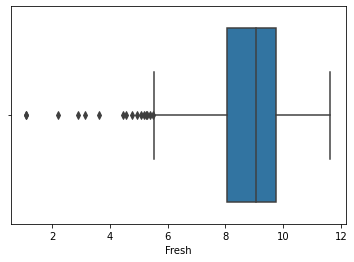

In [121]:
sns.boxplot('Fresh', data=df)

(array([  2.,   3.,   1.,   8.,  17.,  32.,  83., 156., 119.,  19.]),
 array([ 1.09861229,  2.15151121,  3.20441012,  4.25730904,  5.31020796,
         6.36310687,  7.41600579,  8.46890471,  9.52180362, 10.57470254,
        11.62760146]),
 <BarContainer object of 10 artists>)

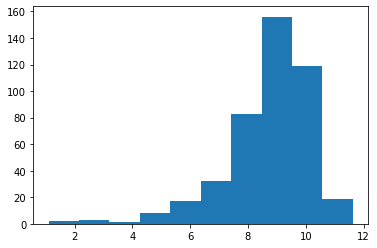

In [122]:
plt.hist(df.Fresh)

<AxesSubplot:xlabel='Milk'>

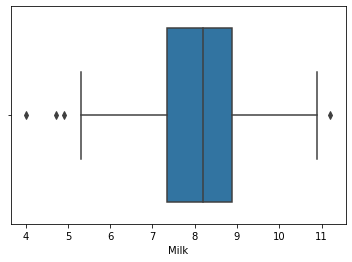

In [123]:
sns.boxplot('Milk', data=df)

(array([  2.,   2.,   9.,  44.,  87., 100., 111.,  63.,  16.,   6.]),
 array([ 4.00733319,  4.72710121,  5.44686924,  6.16663727,  6.8864053 ,
         7.60617333,  8.32594136,  9.04570939,  9.76547742, 10.48524545,
        11.20501347]),
 <BarContainer object of 10 artists>)

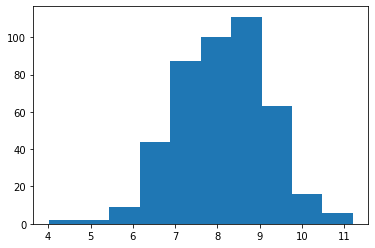

In [124]:
plt.hist(df.Milk)

<AxesSubplot:xlabel='Grocery'>

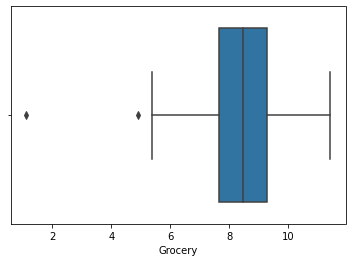

In [125]:
sns.boxplot('Grocery', data=df)

(array([  1.,   0.,   0.,   1.,   7.,  42., 153., 143.,  84.,   9.]),
 array([ 1.09861229,  2.1325497 ,  3.16648711,  4.20042452,  5.23436192,
         6.26829933,  7.30223674,  8.33617415,  9.37011156, 10.40404897,
        11.43798638]),
 <BarContainer object of 10 artists>)

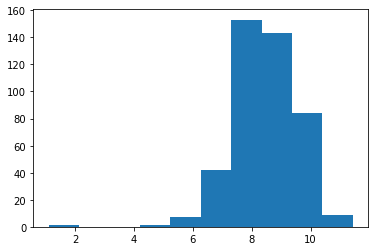

In [126]:
plt.hist(df.Grocery)

<AxesSubplot:xlabel='Frozen'>

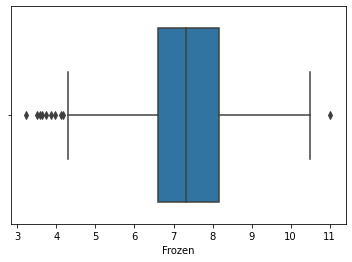

In [127]:
sns.boxplot('Frozen', data=df)

(array([  7.,   8.,  25.,  50., 101., 106.,  80.,  48.,  12.,   3.]),
 array([ 3.21887582,  3.99863617,  4.77839652,  5.55815687,  6.33791721,
         7.11767756,  7.89743791,  8.67719825,  9.4569586 , 10.23671895,
        11.01647929]),
 <BarContainer object of 10 artists>)

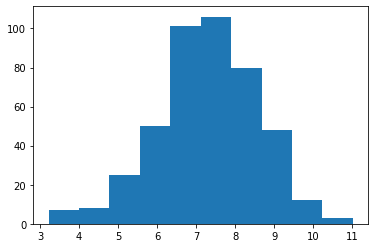

In [128]:
plt.hist(df.Frozen)

<AxesSubplot:xlabel='Detergents_Paper'>

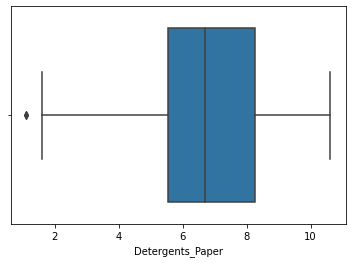

In [129]:
sns.boxplot('Detergents_Paper', data=df)

(array([ 4.,  5.,  9., 37., 84., 91., 59., 83., 57., 11.]),
 array([ 1.09861229,  2.05046095,  3.00230961,  3.95415827,  4.90600694,
         5.8578556 ,  6.80970426,  7.76155292,  8.71340158,  9.66525024,
        10.61709891]),
 <BarContainer object of 10 artists>)

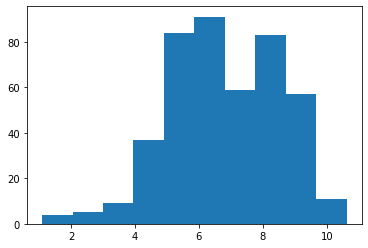

In [130]:
plt.hist(df.Detergents_Paper)

<AxesSubplot:xlabel='Delicassen'>

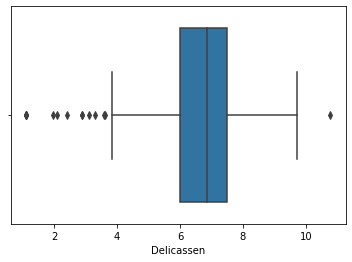

In [131]:
sns.boxplot('Delicassen', data=df)

(array([  5.,   4.,   8.,  22.,  63., 125., 156.,  51.,   5.,   1.]),
 array([ 1.09861229,  2.06652787,  3.03444345,  4.00235903,  4.97027461,
         5.93819019,  6.90610577,  7.87402135,  8.84193693,  9.8098525 ,
        10.77776808]),
 <BarContainer object of 10 artists>)

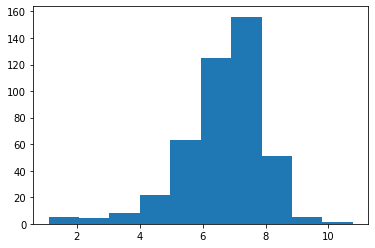

In [132]:
plt.hist(df.Delicassen)

In [118]:
df = np.log(df)

In [119]:
outliers_index=[]
for i in df.columns:
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    for y in df[(df[i] <= q1-(1.5*iqr)) | (df[i] >= q3+(1.5*iqr))].index.values:
        outliers_index.append(y)

In [120]:
final_df=df.drop(df.index[outliers_index])
final_df.shape

(398, 6)

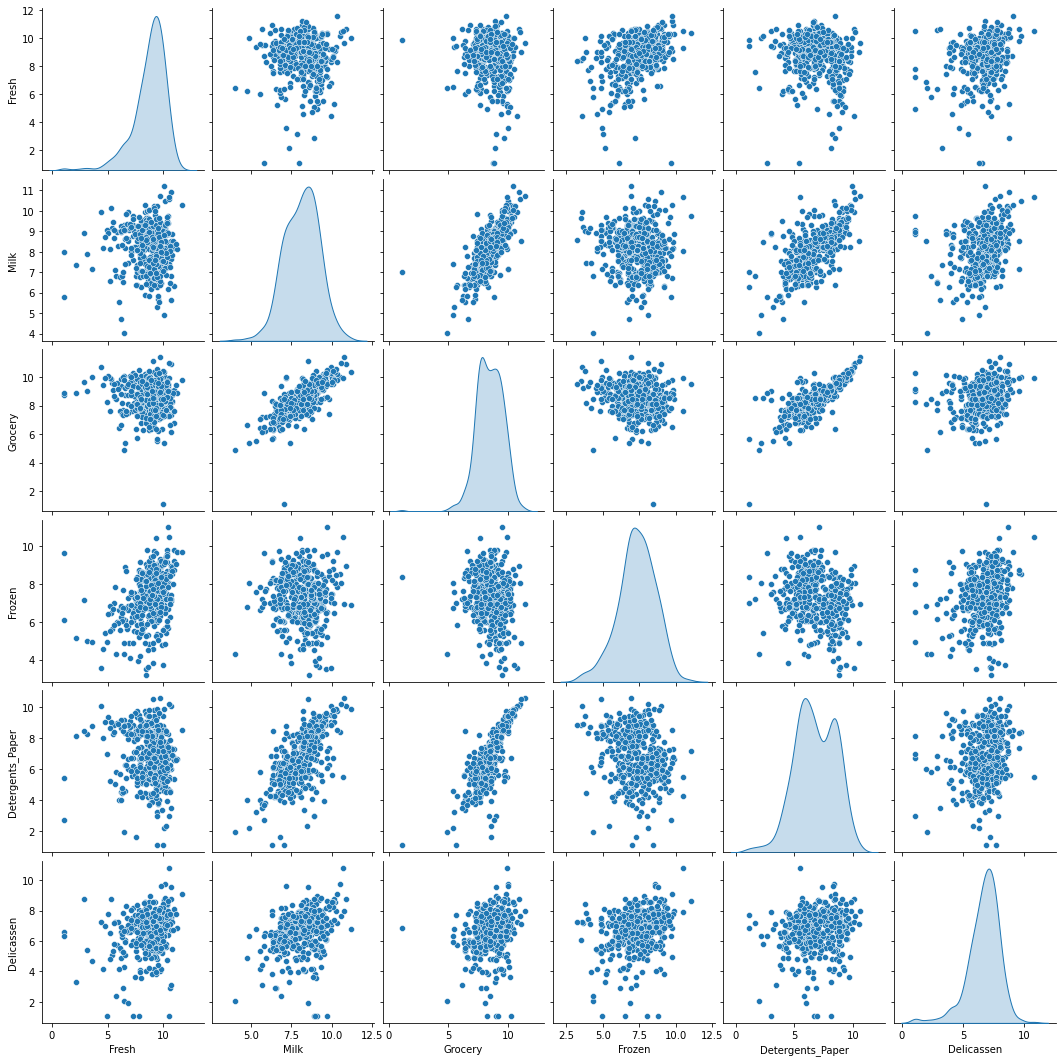

In [343]:
sns.pairplot(log_df,diag_kind = 'kde')

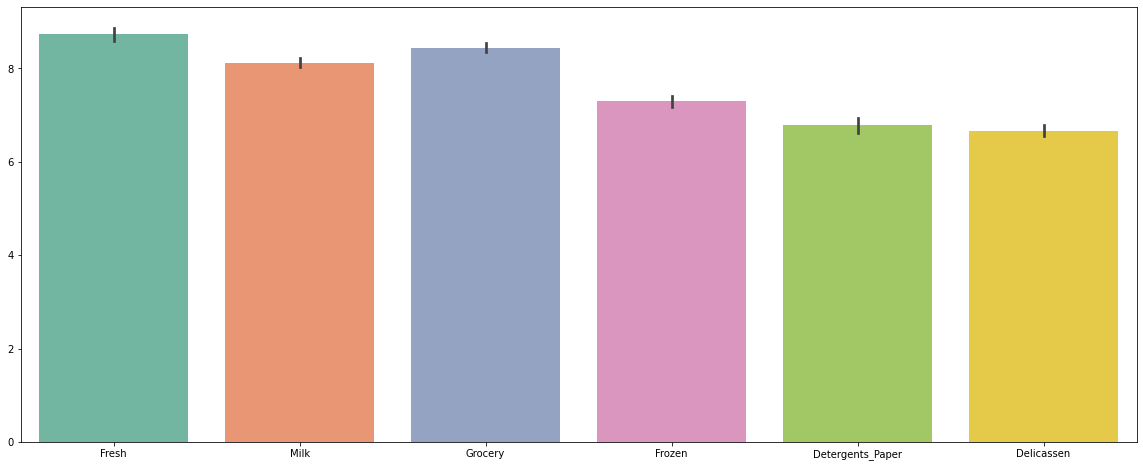

In [365]:
plt.figure(figsize = (20,8))
_ = sns.barplot(data=df, palette="Set2")

<AxesSubplot:>

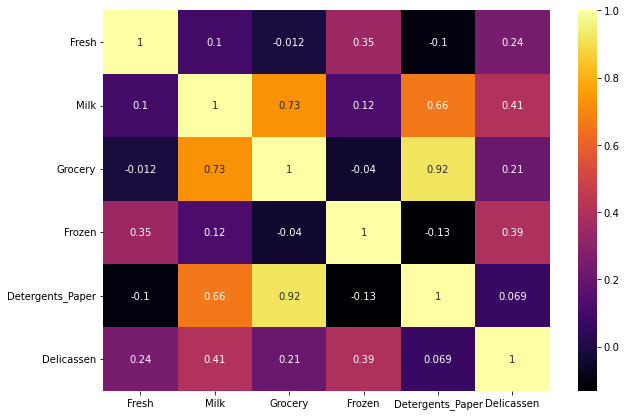

In [394]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno')

The following pairs of features exhibit a high degree of correlation, in order from greatest to least: 

Grocery and Detergents_Paper; Grocery and Milk, and Detergents_Paper and Milk.

In [162]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df)

In [163]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([44.23741664, 71.89452317])

In [164]:
PCA_data = pd.DataFrame(data = pca_results, columns = ['PC1', 'PC2'])
PCA_data.head()

,PC1,PC2
0,-1.750985,-0.070515
1,-1.800365,-0.869754
2,-1.893736,-1.676621
3,1.127313,-1.457982
4,-0.796711,-2.460866


In [146]:
# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Max Variance Explained')
# plt.show()

Dimensionality Reduction for visualizing

In [171]:
principal_component_1 = PCA_data['PC1']
principal_component_2 = PCA_data['PC2']
# principal_component_2 = PCA_data['PC3']

<Figure size 432x288 with 0 Axes>

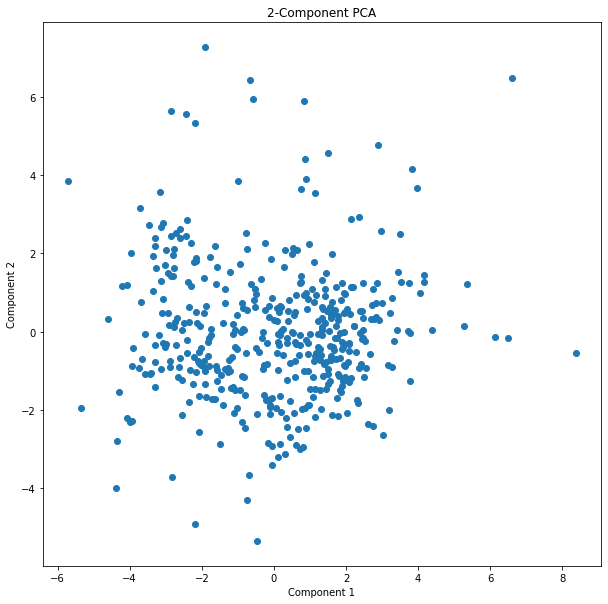

In [172]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2-Component PCA')
plt.scatter(PCA_data['PC1'], PCA_data['PC2'])

In [200]:
loadings = pd.DataFrame(data=np.round(pca.components_,2)) 
loadings

,0,1,2,3,4,5
0,0.17,-0.39,-0.45,0.17,-0.75,-0.15
1,-0.69,-0.16,-0.07,-0.49,-0.04,-0.51


In [201]:
# PC2 (0.6) , PC1 (0.3) , PC1 (0.4) , PC2 (0.4) , PC1 (0.7) , PC2 (0.5)

3rd (Grocery) , 5th (Detergent) , 2nd (Milk) -> PC1

1st (Fresh) , 6th (Delicassen) , 4th (Frozen) -> PC2

In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

si_coeff = []
mapping = {}
K = range(2, 15)
  
for k in K:
    # Building and fitting the model
    kmeansModel = KMeans(n_clusters = k)
    kmm = kmeansModel.fit_predict(PCA_data)
    
    score = silhouette_score(PCA_data, kmm)
    si_coeff.append(score)
    mapping[k] = score

In [169]:
mapping

{2: 0.4191660832029232,
 3: 0.39235868995830997,
 4: 0.3298292356581138,
 5: 0.3438750594739366,
 6: 0.34508181191994874,
 7: 0.36351384943858334,
 8: 0.3576592373585424,
 9: 0.3418092048853155,
 10: 0.35052026099747957,
 11: 0.34942995020011564,
 12: 0.3548573081621549,
 13: 0.35390867864189823,
 14: 0.36434038407270813}

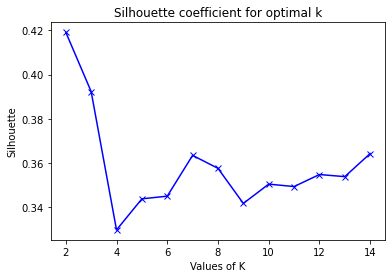

In [170]:
plt.plot(K, si_coeff, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.title('Silhouette coefficient for optimal k')
plt.show()

In [181]:
k_means = KMeans(n_clusters = 3)
model = k_means.fit_predict(pca_results)

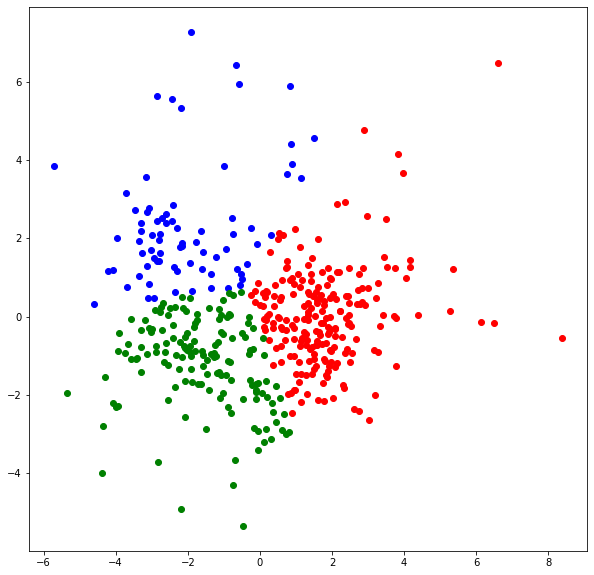

In [182]:
fig = plt.figure(figsize = (10,10))
# ax = fig.add_subplot(111, projection='3d')
plt.scatter(pca_results[model == 0, 0], pca_results[model == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(pca_results[model == 1, 0], pca_results[model == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(pca_results[model == 2, 0], pca_results[model == 2, 1], c = 'green', label = 'Cluster 3')
plt.show()

In [183]:
centers = k_means.cluster_centers_

In [184]:
centers

array([[ 1.78359799,  0.02874918],
       [-2.02777106,  2.31292772],
       [-1.58755361, -1.21424426]])

In [102]:
df.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [185]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8272.0,1657.0,2057.0,1987.0,234.0,592.0
Segment 1,892.0,5143.0,9917.0,338.0,3644.0,327.0
Segment 2,10793.0,7665.0,10371.0,2039.0,3042.0,1847.0


In [186]:
clusters = k_means.labels_
df['Clusters'] = clusters.tolist()

In [188]:
df['Clusters'].value_counts().sort_index()

0    217
1     75
2    148
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Clusters', ylabel='count'>

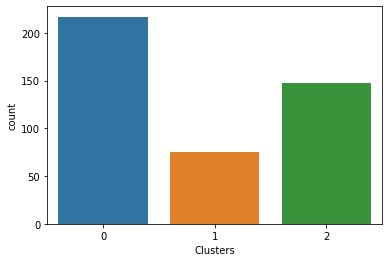

In [189]:
sns.countplot(x='Clusters', data=df)

### CONCLUSION

- On an avg., Segment 2 has lesser Fresh and frozen products, more Milk, very high Grocery,more Detergents_paper and Delicassen product categories than the mean of the data


- Whereas Segment 0 is having every category lesser than Segment 2 as well as lesser than the overall avg. its daily essentials are more than the non-essential items. It should be small retail stores.


- In other words, Segment 2 customers are gold premium customers and seem to be big hotel/restaurant customers.

The customers that belong to this cluster are most likely Big hotel/restaurant customers, because of the above average spending in Fresh, Milk, Grocery and Detergents_Paper, which indicates high volume of these type of products are transactioned.

- Segment 0 customers are more of lower-end retail customers.

I think this cluster can represent some local Markets with a focus on fresh food, because all the values are below the average of each category, which is indicative of low volume, and, a good expenditure is on Fresh products.

- Segment 1 lies in between 0 & 2 i.e. they could be medium-level hotel/restaurant customers of the distributor.

##### This is the stage where we need to investigate the ways that we can make use of the clustered data.

##### First, we can consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. 

##### Next, we can see how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data.

Assuming the findings above are close to the reality, we can say that not all customers will be equally affected. For example, for Big Retails, that have a high daily volume of sales, 3 days a week might not be sufficient for their needs. On the other hand, some local market or restaurant with some storage capability, can receive only for 3 days a week.

So an analysis on the needs of each Cluster's mean customer would be the proper way to decide how to run A/B tests on these customers. For example, it can be concluded that for Segment 0, 3 times a week on average is fine, and for Segment 2, 5 days a week is better.